In [1]:
import numpy as np
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *
from keras.layers import Conv1D,ZeroPadding1D,MaxPooling1D
from keras.models import Sequential

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [2]:
def load_dataset_csv():
    dataset=np.genfromtxt('raw data.csv', delimiter=',', dtype=np.float32)
    train_set_x_orig=dataset[0:3000,1:2049]
    train_set_y_orig=dataset[0:3000,0]
    
    test_set_x_orig=dataset[3000:3500,1:2049]
    test_set_y_orig=dataset[3000:3500,0]
    
    dev_set_x_orig=dataset[3500:4001,1:2049]
    dev_set_y_orig=dataset[3500:4001,0]
    #train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    #test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig , dev_set_x_orig ,dev_set_y_orig

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig ,X_dev_orig ,Y_dev_orig= load_dataset_csv()

# 数据归一化到（0，1）之间
#X_train = X_train_orig/255.
#X_test = X_test_orig/255.
X_train = X_train_orig/(X_train_orig.max() - X_train_orig.min())
X_test = X_test_orig/(X_test_orig.max() - X_test_orig.min())
X_dev = X_dev_orig

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T
Y_dev = Y_dev_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("number of dev examples = " + str(X_test.shape[0])) 
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))
                      

number of training examples = 3000
number of test examples = 500
number of dev examples = 500
X_train shape: (3000, 2048)
Y_train shape: (3000,)
X_test shape: (500, 2048)
Y_test shape: (500,)
X_dev shape: (500, 2048)
Y_dev shape: (500,)


In [4]:
X_train=X_train[:,None]
Y_train=Y_train[:,None]
X_test=X_test[:,None]
Y_test=Y_test[:,None]
X_dev=X_dev[:,None]
Y_dev=Y_dev[:,None]
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(X_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))

X_train shape: (3000, 1, 2048)
Y_train shape: (3000, 1, 2048)
X_test shape: (500, 1, 2048)
Y_test shape: (500, 1)
X_dev shape: (500, 1, 2048)
Y_dev shape: (500, 1)


In [5]:
X_train=np.swapaxes(X_train,1,2)
#Y_train=np.swapaxes(Y_train,0,1)
X_test=np.swapaxes(X_test,1,2)
#Y_test=np.swapaxes(Y_test,0,1)
X_dev=np.swapaxes(X_dev,1,2)
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
print ("X_dev shape: " + str(X_dev.shape))
print ("Y_dev shape: " + str(Y_dev.shape))

X_train shape: (3000, 2048, 1)
Y_train shape: (3000, 1)
X_test shape: (500, 2048, 1)
Y_test shape: (500, 1)
X_dev shape: (500, 2048, 1)
Y_dev shape: (500, 1)


In [6]:
batch_size = 128
nb_classes = 1
nb_epoch = 10

# 输入图像的维度，此处是mnist图像，因此是28*28
#img_rows, img_cols = 28, 28
# 卷积层中使用的卷积核的个数
nb_filters = 32
# 池化层操作的范围
pool_size = [2,]
# 卷积核的大小
kernel_size = [16,]

input_shape = (2048,1)

# 建立序贯模型
model = Sequential()

# 卷积层，对二维输入进行滑动窗卷积
# 当使用该层为第一层时，应提供input_shape参数，在tf模式中，通道维位于第三个位置
# border_mode：边界模式，为"valid","same"或"full"，即图像外的边缘点是补0
# 还是补成相同像素，或者是补1

model.add(Conv1D(nb_filters, 16 ,
                        padding='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))

# 卷积层，激活函数是ReLu
model.add(Conv1D(nb_filters, 16))
model.add(Activation('relu'))

# 池化层，选用Maxpooling，给定pool_size，dropout比例为0.25
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Dropout(0.25))

# Flatten层，把多维输入进行一维化，常用在卷积层到全连接层的过渡
model.add(Flatten())

# 包含128个神经元的全连接层，激活函数为ReLu，dropout比例为0.5
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 包含10个神经元的输出层，激活函数为Softmax
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

# 输出模型的参数信息
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2033, 32)          544       
_________________________________________________________________
activation_1 (Activation)    (None, 2033, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2018, 32)          16416     
_________________________________________________________________
activation_2 (Activation)    (None, 2018, 32)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1009, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1009, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32288)             0         
__________

In [7]:

#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [8]:
def shuffle_data(X,Y):
    m = X.shape[0]
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    #shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))
    shuffled_Y = Y[permutation,:]
    
    return shuffled_X,shuffled_Y

In [9]:
#编译模型
model.compile(loss='binary_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])
#创建一个实例history
history = LossHistory()

#先打乱数据
#X_train,Y_train = shuffle_data(X_train,Y_train)
#X_dev,Y_dev = shuffle_data(X_dev,Y_dev)

# 训练模型
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,validation_split=0.2,
          verbose=1, validation_data=None,shuffle=True,callbacks=[history])



C:\Anaconda3\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2400 samples, validate on 600 samples
Epoch 1/10
2400/2400 [==============================] - 47s 19ms/step - loss: 0.6574 - acc: 0.5146 - val_loss: 0.5394 - val_acc: 0.6383
Epoch 2/10
2400/2400 [==============================] - 46s 19ms/step - loss: 0.6001 - acc: 0.6829 - val_loss: 0.9360 - val_acc: 0.5167
Epoch 3/10
2400/2400 [==============================] - 47s 19ms/step - loss: 0.5988 - acc: 0.6575 - val_loss: 0.3441 - val_acc: 1.0000
Epoch 4/10
2400/2400 [==============================] - 46s 19ms/step - loss: 0.5112 - acc: 0.9021 - val_loss: 0.1499 - val_acc: 1.0000
Epoch 5/10
2400/2400 [==============================] - 45s 19ms/step - loss: 0.1984 - acc: 0.9650 - val_loss: 0.0370 - val_acc: 1.0000
Epoch 6/10
2400/2400 [==============================] - 47s 19ms/step - loss: 0.0243 - acc: 1.0000 - val_loss: 0.0133 - val_acc: 1.0000
Epoch 7/10
2400/2400 [==============================] - 46s 19ms/step - loss: 0.0115 - acc: 1.0000 - val_loss: 0.0074 - val_acc: 1.0000
E

Test score: 0.00714498180524
Test accuracy: 1.0


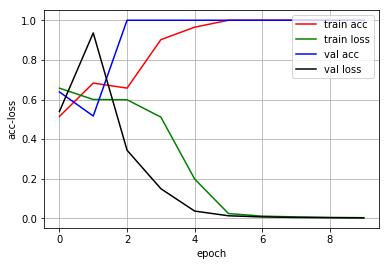

In [12]:
# 按batch计算在某些输入数据上模型的误差
score = model.evaluate(X_test, Y_test, verbose=0)

# 输出训练好的模型在测试集上的表现
print('Test score:', score[0])
print('Test accuracy:', score[1])
#绘制acc-loss曲线
history.loss_plot('epoch')

In [11]:
#model.save('my_first_kears_model.h5')